# Fake News Classifier with LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [91]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Interview Topics/Fake News Classifier/train.csv")
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [92]:
dataset = dataset.dropna()

In [93]:
# Get Independent and dependent features
X = dataset.drop("label", axis=1)
y = dataset["label"]

In [103]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

**Word Embedding**

In [95]:
vocab_size = 5000

In [96]:
news_dataset = X.copy()
news_dataset.reset_index(inplace=True)

In [97]:
pip install nltk

In [98]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [99]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

corpus = []
for i in range(0, len(news_dataset)):
  review = re.sub('[^a-zA-Z]', ' ', news_dataset['title'][i])
  review = review.lower()
  review = review.split()

  review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [100]:
# One hot reprsentation
one_hot_rep = [one_hot(words, vocab_size) for words in corpus]
one_hot_rep[:3]

[[1209, 2800, 3416, 3578, 125, 2967, 1356, 3777, 1701, 4541],
 [675, 3086, 3872, 878, 3089, 524, 1847],
 [2015, 2838, 1739, 3009]]

In [101]:
# Embedding Representation
sentence_length = 20
embedded_doc = pad_sequences(one_hot_rep, maxlen=sentence_length, padding='pre')
embedded_doc[:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1209,
        2800, 3416, 3578,  125, 2967, 1356, 3777, 1701, 4541],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  675, 3086, 3872,  878, 3089,  524, 1847],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 2015, 2838, 1739, 3009]],
      dtype=int32)

# LSTM Model Creation

In [104]:
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_features, input_length=sentence_length))
model.add(Dropout(0.3))
# model.add(LSTM(100))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 20, 40)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________


In [105]:
X_final = np.array(embedded_doc)
y_final = np.array(y)

X_final.shape, y_final.shape

((18285, 20), (18285,))

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

**Model Training**

In [107]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
192/192 [==============================] - 10s 52ms/step - loss: 0.3054 - accuracy: 0.8577 - val_loss: 0.2112 - val_accuracy: 0.9117
Epoch 2/10
192/192 [==============================] - 9s 48ms/step - loss: 0.1436 - accuracy: 0.9441 - val_loss: 0.2283 - val_accuracy: 0.9080
Epoch 3/10
192/192 [==============================] - 9s 48ms/step - loss: 0.1042 - accuracy: 0.9630 - val_loss: 0.2845 - val_accuracy: 0.9056
Epoch 4/10
192/192 [==============================] - 9s 48ms/step - loss: 0.0789 - accuracy: 0.9718 - val_loss: 0.2988 - val_accuracy: 0.9037
Epoch 5/10
192/192 [==============================] - 9s 48ms/step - loss: 0.0589 - accuracy: 0.9784 - val_loss: 0.2793 - val_accuracy: 0.9019
Epoch 6/10
192/192 [==============================] - 9s 48ms/step - loss: 0.0438 - accuracy: 0.9862 - val_loss: 0.3452 - val_accuracy: 0.9012
Epoch 7/10
192/192 [==============================] - 9s 48ms/step - loss: 0.0397 - accuracy: 0.9866 - val_loss: 0.4876 - val_accuracy: 0.895

In [108]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [109]:
from sklearn import metrics
import itertools

Accuracy Score:  0.9025683512841757
Confusion matrix, without normalization


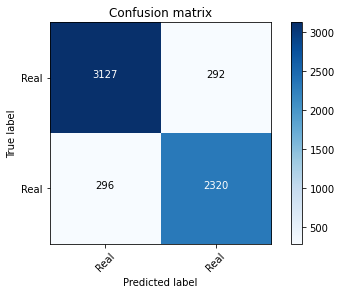

In [110]:
pred = model.predict_classes(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy Score: ", score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Real', 'Real'])

#Submission Data prep for Kaggle

In [111]:
test_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Interview Topics/Fake News Classifier/test.csv")
test_dataset.fillna('x', inplace=True)

In [112]:
test_corpus = []
for i in range(0, len(test_dataset)):
  review = re.sub('[^a-zA-Z]', ' ', test_dataset['title'][i])
  review = review.lower()
  review = review.split()

  review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  test_corpus.append(review)

In [113]:
# One hot reprsentation
one_hot_rep_test = [one_hot(words, vocab_size) for words in test_corpus]
one_hot_rep_test[:3]

[[1993, 792, 1479, 3134, 722, 4928, 2844, 4114, 1933, 4625, 3327],
 [4959, 4037, 2384, 201, 1305, 2127, 694],
 [4096, 2765, 1281, 1046, 2526, 2245, 2769, 74, 1531, 4625]]

In [114]:
# Embedding Representation
embedded_doc_test = pad_sequences(one_hot_rep_test, maxlen=sentence_length, padding='pre')
embedded_doc_test[:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0, 1993,  792,
        1479, 3134,  722, 4928, 2844, 4114, 1933, 4625, 3327],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 4959, 4037, 2384,  201, 1305, 2127,  694],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 4096,
        2765, 1281, 1046, 2526, 2245, 2769,   74, 1531, 4625]],
      dtype=int32)

In [115]:
X_test_final = np.array(embedded_doc_test)

In [116]:
pred_test = model.predict_classes(X_test_final)
pred_test_modified = []
for item in pred_test:
  pred_test_modified.append(item[0])

In [118]:
test_dataset['label'] = pred_test_modified
test_dataset = test_dataset[["id", "label"]]
test_dataset.to_csv("/content/drive/MyDrive/Colab Notebooks/Interview Topics/Fake News Classifier/submission.csv", index=False)
test_dataset.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,0
4,20804,1
